In [189]:
import acquire as a
import prepare as p
import model as m

In [302]:
titanic = p.prep_titanic((a.get_titanic_data()))
train,validate,test = p.split(titanic,'survived')
train,validate,test = m.preprocess_titanic(train,validate,test)

this file exists, reading from csv


In [303]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,,,,
776,0,3,29.699118,0,0,7.7500,1,1,1,0
829,1,1,62.000000,0,0,80.0000,1,0,0,1
215,1,1,31.000000,1,0,113.2750,0,0,0,0
258,1,1,35.000000,0,0,512.3292,1,0,0,0
129,0,3,45.000000,0,0,6.9750,1,1,0,1


In [304]:
# 1 baseline prediction: predicting the most prevelant class in the training dataset (the mode)
print(train.survived.mode())
baseline_prediction = 'Not Survived'

0    0
Name: survived, dtype: int64


In [305]:
# baseline accuracy
print(train.survived.value_counts())
baseline_accuracy = train.survived.value_counts(normalize = True)
print(baseline_accuracy)

survived
0    329
1    205
Name: count, dtype: int64
survived
0    0.616105
1    0.383895
Name: proportion, dtype: float64


In [194]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_val = validate.drop(columns=['survived'])
y_val = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [53]:
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


# First Model

[Text(0.5, 0.875, 'tenure <= 17.5\ngini = 0.39\nsamples = 4219\nvalue = [3098, 1121]'),
 Text(0.25, 0.625, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.496\nsamples = 1575\nvalue = [859, 716]'),
 Text(0.125, 0.375, 'tenure <= 3.5\ngini = 0.41\nsamples = 897\nvalue = [639, 258]'),
 Text(0.0625, 0.125, 'gini = 0.49\nsamples = 377\nvalue = [215, 162]'),
 Text(0.1875, 0.125, 'gini = 0.301\nsamples = 520\nvalue = [424, 96]'),
 Text(0.375, 0.375, 'total_charges <= 124.475\ngini = 0.438\nsamples = 678\nvalue = [220, 458]'),
 Text(0.3125, 0.125, 'gini = 0.243\nsamples = 141\nvalue = [20, 121]'),
 Text(0.4375, 0.125, 'gini = 0.467\nsamples = 537\nvalue = [200, 337]'),
 Text(0.75, 0.625, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.259\nsamples = 2644\nvalue = [2239, 405]'),
 Text(0.625, 0.375, 'contract_type_Two year <= 0.5\ngini = 0.104\nsamples = 1470\nvalue = [1389, 81]'),
 Text(0.5625, 0.125, 'gini = 0.169\nsamples = 760\nvalue = [689, 71]'),
 Text(0.6875, 0.125, 'gini = 0.028

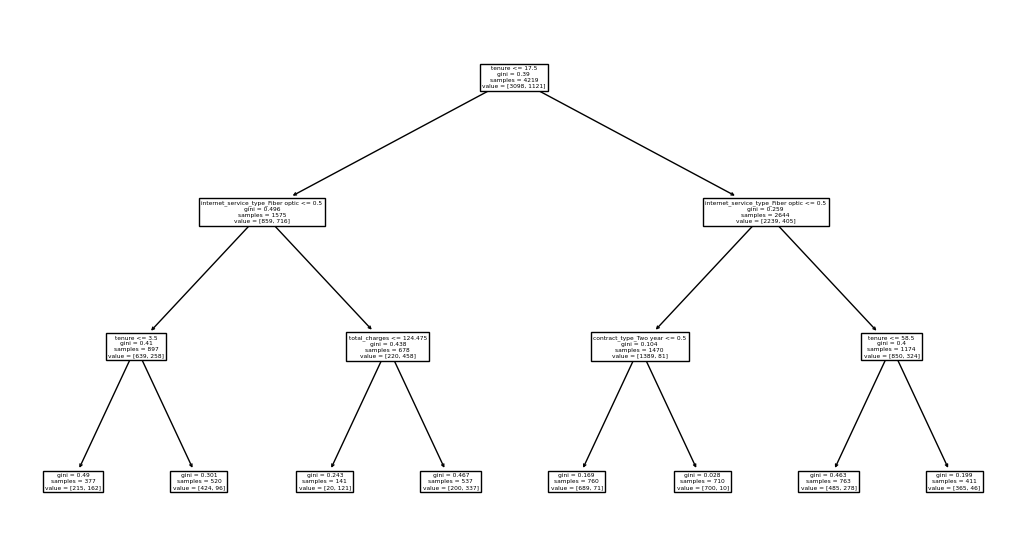

In [238]:
# 2.Fit the decision tree classifier to your training sample and transform 
# (i.e. make predictions on the training sample)

clf1 = DecisionTreeClassifier(max_depth=3)

# model.fit(X, y)
train1 = clf1.fit(X_train, y_train)

plt.figure(figsize=(13, 7))
plot_tree(clf1, feature_names=X_train.columns.tolist())

In [239]:
# make prediction on train obeservations

ytrain_pred = clf1.predict(X_train)
ytrain_pred[0:5]

array([0, 1, 0, 0, 0])

In [240]:
ytrain_pred_proba = clf1.predict_proba(X_train)
ytrain_pred_proba[0:5]

array([[0.90657895, 0.09342105],
       [0.37243948, 0.62756052],
       [0.88807786, 0.11192214],
       [0.57029178, 0.42970822],
       [0.81538462, 0.18461538]])

In [241]:
# 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.
clf1.score(X_train, y_train)

0.7907086987437781

In [307]:
accuracy_score(y_train,ytrain_pred)

0.7907086987437781

In [313]:
confusion_matrix(y_train, ytrain_pred,normalize='true')

# [True Negative   False Positive]
# [False Negative  True Positive]


array([[0.92898644, 0.07101356],
       [0.59143622, 0.40856378]])

In [244]:
print(classification_report(y_train, ytrain_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3098
           1       0.68      0.41      0.51      1121

    accuracy                           0.79      4219
   macro avg       0.74      0.67      0.69      4219
weighted avg       0.78      0.79      0.77      4219



# Model 2

In [245]:
clf2 = DecisionTreeClassifier(max_depth=10)

In [246]:
clf2 = clf2.fit(X_train, y_train)

In [247]:
ytrain_pred2 = clf2.predict(X_train)

In [248]:
clf2.score(X_train, y_train)

0.8862289642095283

In [234]:
print(classification_report(y_train, ytrain_pred2))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3098
           1       0.81      0.74      0.77      1121

    accuracy                           0.89      4219
   macro avg       0.86      0.84      0.85      4219
weighted avg       0.88      0.89      0.88      4219



# clf2 performs better on my in sample data

# Validate

In [249]:
clf1.score(X_val, y_val)

0.7908961593172119

In [250]:
clf2.score(X_val, y_val)

0.7731152204836416

# model 1 performs better on validate

In [251]:
clf1.score(X_test, y_test)

0.7882018479033405

# Telco Dataset

In [267]:
telco = a.get_telco_data()

this file exists, reading from csv


In [268]:
telco = p.prep_telco(telco)

In [269]:
train,validate,test = p.split(telco,'churn')

In [270]:
train,validate,test = model.preprocess_telco(train,validate,test)

In [271]:
X_train = train.drop(columns=['churn_Yes'])
y_train = train.churn_Yes

X_val = validate.drop(columns=['churn_Yes'])
y_val = validate.churn_Yes

X_test = test.drop(columns=['churn_Yes'])
y_test = test.churn_Yes



In [298]:
#baseline

y_train.value_counts(normalize = True)

churn_Yes
0    0.734297
1    0.265703
Name: proportion, dtype: float64

# Model 1

In [286]:
clf1 = DecisionTreeClassifier(max_depth=3, random_state=123)

In [287]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [288]:
clf1.score(X_train, y_train)

0.7907086987437781

# Model 2

In [284]:
clf2 = DecisionTreeClassifier(max_depth=5, random_state=123)

In [289]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

In [290]:
clf2.score(X_train, y_train)

0.8027968712965158

# Validate

In [291]:
clf1.score(X_val, y_val)

0.7908961593172119

In [292]:
clf2.score(X_val, y_val)

0.7972972972972973

# Pick model2

In [293]:
clf2.score(X_test,y_test)

0.7882018479033405